<a href="https://colab.research.google.com/github/RajAakash/torch/blob/main/RegressionPractise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [3]:
device ="cuda" if torch.cuda.is_available() else 'cpu'
print('Using devic',device)

Using devic cuda


In [4]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
print(len(X))
train_split=int(0.8*len(X))
X_train,y_train =X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
print(len(X_train),len(X_test),len(y_train),len(y_test))

50
40 10 40 10


In [6]:
def plot_predictions(train_data=X_train,test_data=X_test,
                     train_labels=y_train,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

  plt.legend(prop={"size":14})

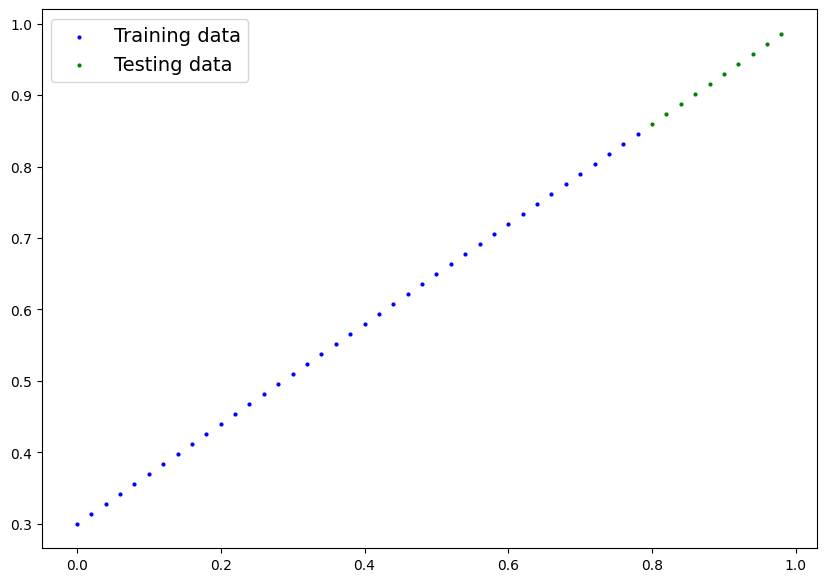

In [7]:
plot_predictions(X_train,X_test,y_train,y_test)

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModel()
model_1,model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
#check what device are you using
next(model_1.parameters()).device

device(type='cpu')

In [10]:
#change that model to use cuda(from variable `device`)
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [11]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

# **Training**

In [12]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.001)

In [13]:
torch.manual_seed(42)
epochs=200

X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
  #set the model in training mode
  model_1.train()
  #1.Forward pass
  y_pred=model_1(X_train)
  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train)
  #3.Optimize the zero grad
  optimizer.zero_grad()
  #4.Perform backpropagation
  loss.backward()
  #5.Optimizer step
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)

  if(epoch%10==0):
    print(f'Epochs:{epoch} |Loss:{loss} | Test Loss:{test_loss}')

Epochs:0 |Loss:0.5551779866218567 | Test Loss:0.5861001014709473
Epochs:10 |Loss:0.5436570644378662 | Test Loss:0.5726293921470642
Epochs:20 |Loss:0.5321362614631653 | Test Loss:0.5591585040092468
Epochs:30 |Loss:0.5206153988838196 | Test Loss:0.5456876754760742
Epochs:40 |Loss:0.5090945363044739 | Test Loss:0.5322169661521912
Epochs:50 |Loss:0.49757376313209534 | Test Loss:0.5187460780143738
Epochs:60 |Loss:0.48605284094810486 | Test Loss:0.5052752494812012
Epochs:70 |Loss:0.47453203797340393 | Test Loss:0.49180442094802856
Epochs:80 |Loss:0.4630111753940582 | Test Loss:0.4783336818218231
Epochs:90 |Loss:0.4514903724193573 | Test Loss:0.4648628234863281
Epochs:100 |Loss:0.4399694502353668 | Test Loss:0.4513919949531555
Epochs:110 |Loss:0.4284486472606659 | Test Loss:0.4379211962223053
Epochs:120 |Loss:0.4169278144836426 | Test Loss:0.4244503974914551
Epochs:130 |Loss:0.4054069519042969 | Test Loss:0.41097956895828247
Epochs:140 |Loss:0.39388611912727356 | Test Loss:0.39750877022743225

In [14]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [15]:
model_1.eval()

with torch.inference_mode():
  y_preds=model_1(X_test)

y_preds

tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]], device='cuda:0')

In [16]:
model_1.eval()

with torch.no_grad():
  y_preds=model_1(X_test)

y_preds

tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]], device='cuda:0')

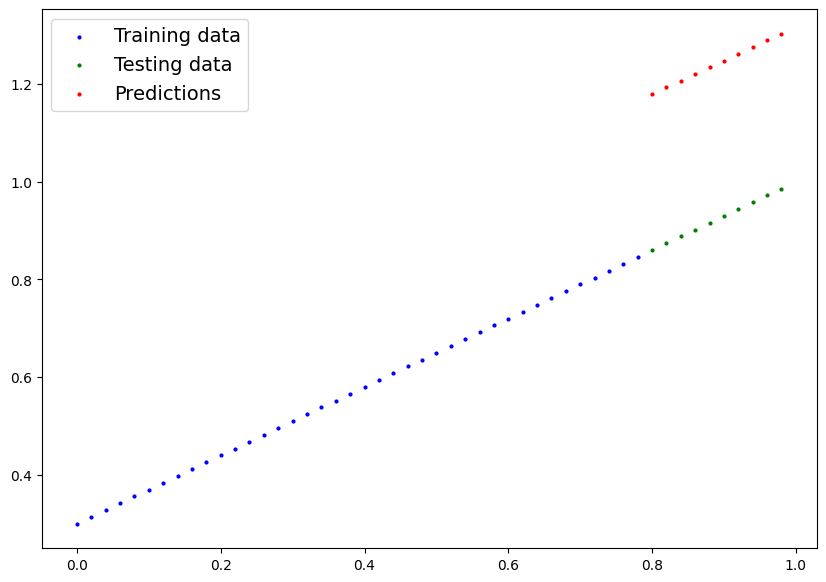

In [17]:
plot_predictions(predictions=y_preds.cpu())

# **Saving and Loading model**

In [18]:
from pathlib import Path

#1.Create model directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME="01_pytorch_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f'Saving model to:{MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_model_1.pth


# **Load the model**

In [22]:
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [23]:
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [24]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [26]:
loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds=loaded_model(X_test)
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')